In [32]:
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [6]:
df=pd.read_csv('Drug_overdose_death_rates__by_drug_type__sex__age__race__and_Hispanic_origin__United_States_20240518.csv')

In [10]:
# Convert 'Year' column from int to object (string)
df['YEAR'] = df['YEAR'].astype(str)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6228 entries, 0 to 6227
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   INDICATOR       6228 non-null   object 
 1   PANEL           6228 non-null   object 
 2   PANEL_NUM       6228 non-null   int64  
 3   UNIT            6228 non-null   object 
 4   UNIT_NUM        6228 non-null   int64  
 5   STUB_NAME       6228 non-null   object 
 6   STUB_NAME_NUM   6228 non-null   int64  
 7   STUB_LABEL      6228 non-null   object 
 8   STUB_LABEL_NUM  6228 non-null   float64
 9   YEAR            6228 non-null   object 
 10  YEAR_NUM        6228 non-null   int64  
 11  AGE             6228 non-null   object 
 12  AGE_NUM         6228 non-null   float64
 13  ESTIMATE        5117 non-null   float64
 14  FLAG            1111 non-null   object 
dtypes: float64(3), int64(4), object(8)
memory usage: 730.0+ KB


In [12]:
df.head()

,INDICATOR,PANEL,PANEL_NUM,UNIT,UNIT_NUM,STUB_NAME,STUB_NAME_NUM,STUB_LABEL,STUB_LABEL_NUM,YEAR,YEAR_NUM,AGE,AGE_NUM,ESTIMATE,FLAG
0,Drug overdose death rates,All drug overdose deaths,0,"Deaths per 100,000 resident population, age-ad...",1,Total,0,All persons,0.1,1999,1,All ages,1.1,6.1,NaN
1,Drug overdose death rates,All drug overdose deaths,0,"Deaths per 100,000 resident population, age-ad...",1,Total,0,All persons,0.1,2000,2,All ages,1.1,6.2,NaN
2,Drug overdose death rates,All drug overdose deaths,0,"Deaths per 100,000 resident population, age-ad...",1,Total,0,All persons,0.1,2001,3,All ages,1.1,6.8,NaN
3,Drug overdose death rates,All drug overdose deaths,0,"Deaths per 100,000 resident population, age-ad...",1,Total,0,All persons,0.1,2002,4,All ages,1.1,8.2,NaN
4,Drug overdose death rates,All drug overdose deaths,0,"Deaths per 100,000 resident population, age-ad...",1,Total,0,All persons,0.1,2003,5,All ages,1.1,8.9,NaN


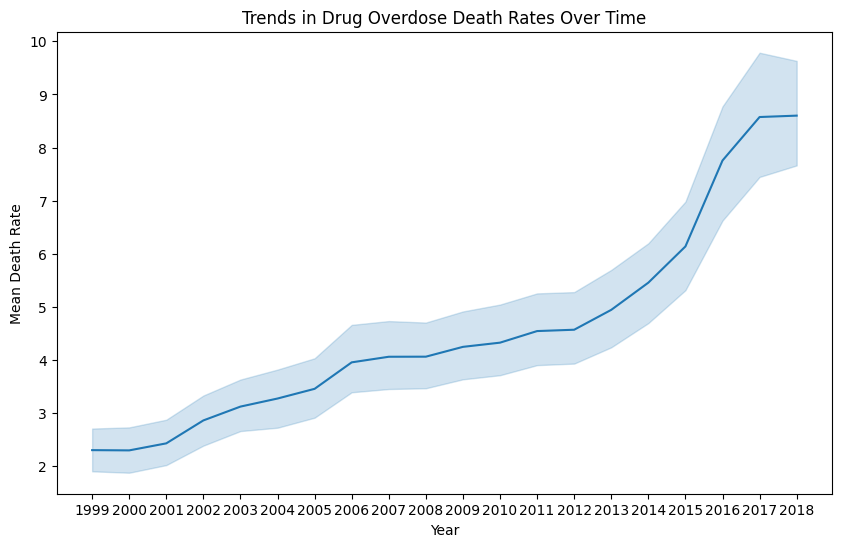

In [15]:
# 1. Trends Over Time
# Plot trends in overall death rates over time
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x='YEAR', y='ESTIMATE', estimator='mean')
plt.title('Trends in Drug Overdose Death Rates Over Time')
plt.xlabel('Year')
plt.ylabel('Mean Death Rate')
plt.show()

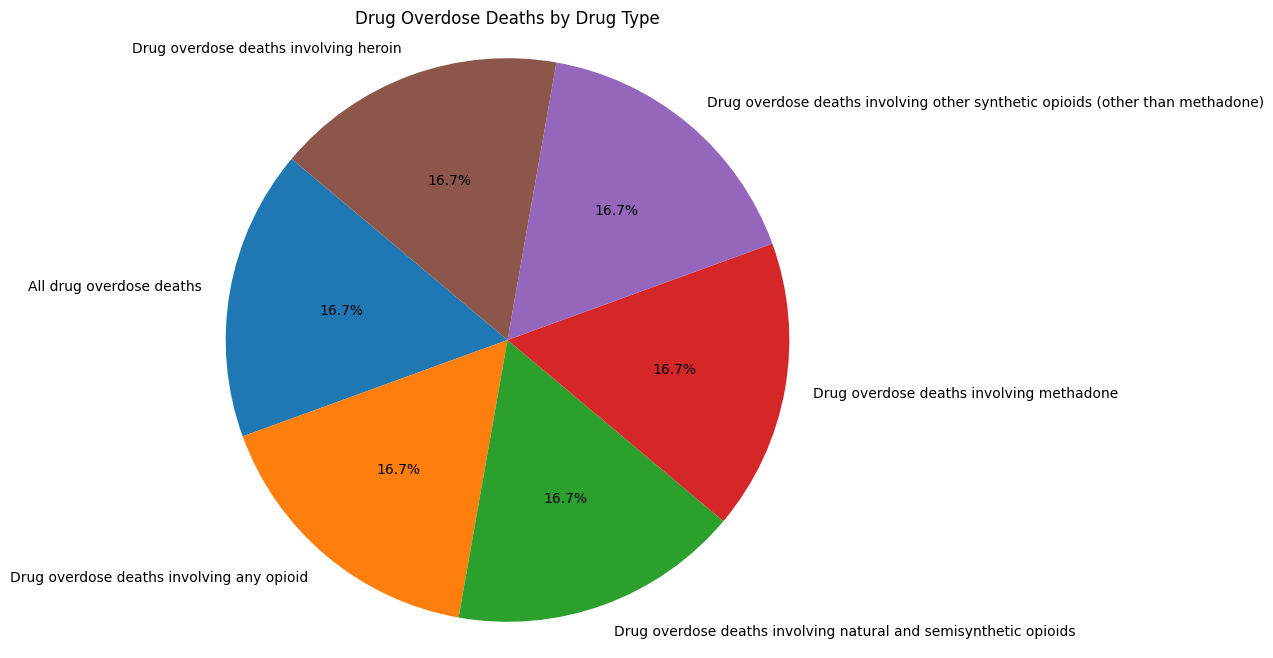

In [24]:
# Example data (replace with your actual data processing)
# Aggregate data for pie charts
drug_type_counts = df['PANEL'].value_counts()
#sex_counts = df['PANEL'].value_counts()
age_counts = df['AGE'].value_counts()
race_counts = df['STUB_NAME'].value_counts()

# 1. Pie chart for Drug Type
plt.figure(figsize=(8, 8))
plt.pie(drug_type_counts, labels=drug_type_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Drug Overdose Deaths by Drug Type')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

In [27]:
df['GENDER'] = df['STUB_LABEL'].apply(lambda x: 'Male' if 'Male' in x else 'Female' if 'Female' in x else 'Unknown')

In [28]:
df['GENDER'].value_counts()

GENDER
Male       2454
Female     2454
Unknown    1320
Name: count, dtype: int64

In [30]:
average_estimate_by_gender = df.groupby('GENDER')['ESTIMATE'].mean().reset_index()
average_estimate_by_gender

,GENDER,ESTIMATE
0,Female,3.344382
1,Male,6.095885
2,Unknown,4.764695


In [31]:
df['AGE'].value_counts()

AGE
All ages             2988
Under 15 years        360
15-24 years           360
25-34 years           360
35-44 years           360
45-54 years           360
55-64 years           360
65-74 years           360
75-84 years           360
85 years and over     360
Name: count, dtype: int64

<Axes: xlabel='GENDER', ylabel='ESTIMATE'>

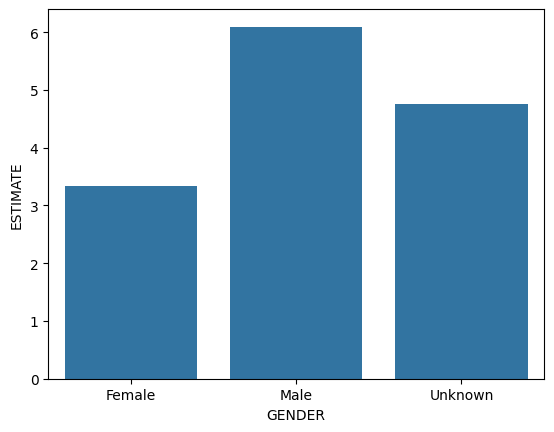

In [34]:
sns.barplot(data=average_estimate_by_gender, x='GENDER', y='ESTIMATE')

In [36]:
average_estimate_by_gender_age = df.groupby(['GENDER','AGE'])['ESTIMATE'].mean().reset_index()
average_estimate_by_gender_age

,GENDER,AGE,ESTIMATE
0,Female,15-24 years,1.693043
1,Female,25-34 years,4.301667
2,Female,35-44 years,5.841667
3,Female,45-54 years,6.645000
4,Female,55-64 years,4.244144
5,Female,65-74 years,1.737234
6,Female,75-84 years,1.510000
7,Female,85 years and over,2.123404
8,Female,All ages,3.103947
9,Female,Under 15 years,0.145000


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, '15-24 years'),
  Text(1, 0, '25-34 years'),
  Text(2, 0, '35-44 years'),
  Text(3, 0, '45-54 years'),
  Text(4, 0, '55-64 years'),
  Text(5, 0, '65-74 years'),
  Text(6, 0, '75-84 years'),
  Text(7, 0, '85 years and over'),
  Text(8, 0, 'All ages'),
  Text(9, 0, 'Under 15 years')])

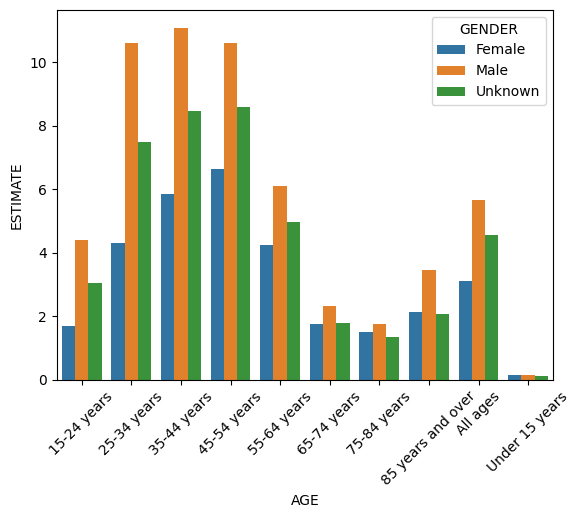

In [38]:
sns.barplot(data=average_estimate_by_gender_age, x='AGE', y='ESTIMATE', hue='GENDER')
plt.xticks(rotation=45)


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
 [Text(0, 0, '1999'),
  Text(1, 0, '2000'),
  Text(2, 0, '2001'),
  Text(3, 0, '2002'),
  Text(4, 0, '2003'),
  Text(5, 0, '2004'),
  Text(6, 0, '2005'),
  Text(7, 0, '2006'),
  Text(8, 0, '2007'),
  Text(9, 0, '2008'),
  Text(10, 0, '2009'),
  Text(11, 0, '2010'),
  Text(12, 0, '2011'),
  Text(13, 0, '2012'),
  Text(14, 0, '2013'),
  Text(15, 0, '2014'),
  Text(16, 0, '2015'),
  Text(17, 0, '2016'),
  Text(18, 0, '2017'),
  Text(19, 0, '2018')])

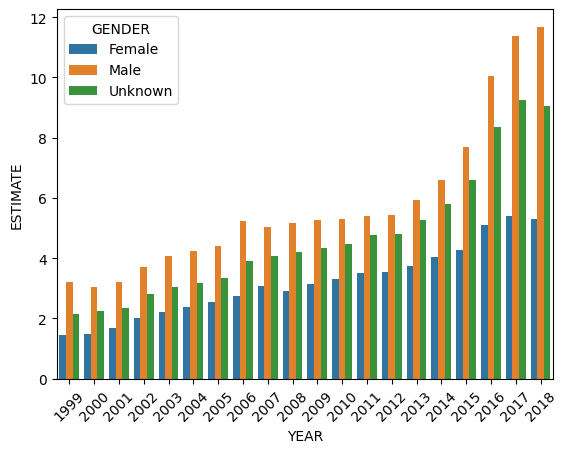

In [43]:
# Calculate the average estimate for each gender and year
average_estimate_by_gender_year = df.groupby(['GENDER', 'YEAR'])['ESTIMATE'].mean().reset_index()
sns.barplot(data=average_estimate_by_gender_year, x='YEAR', y='ESTIMATE', hue='GENDER')
plt.xticks(rotation=45)



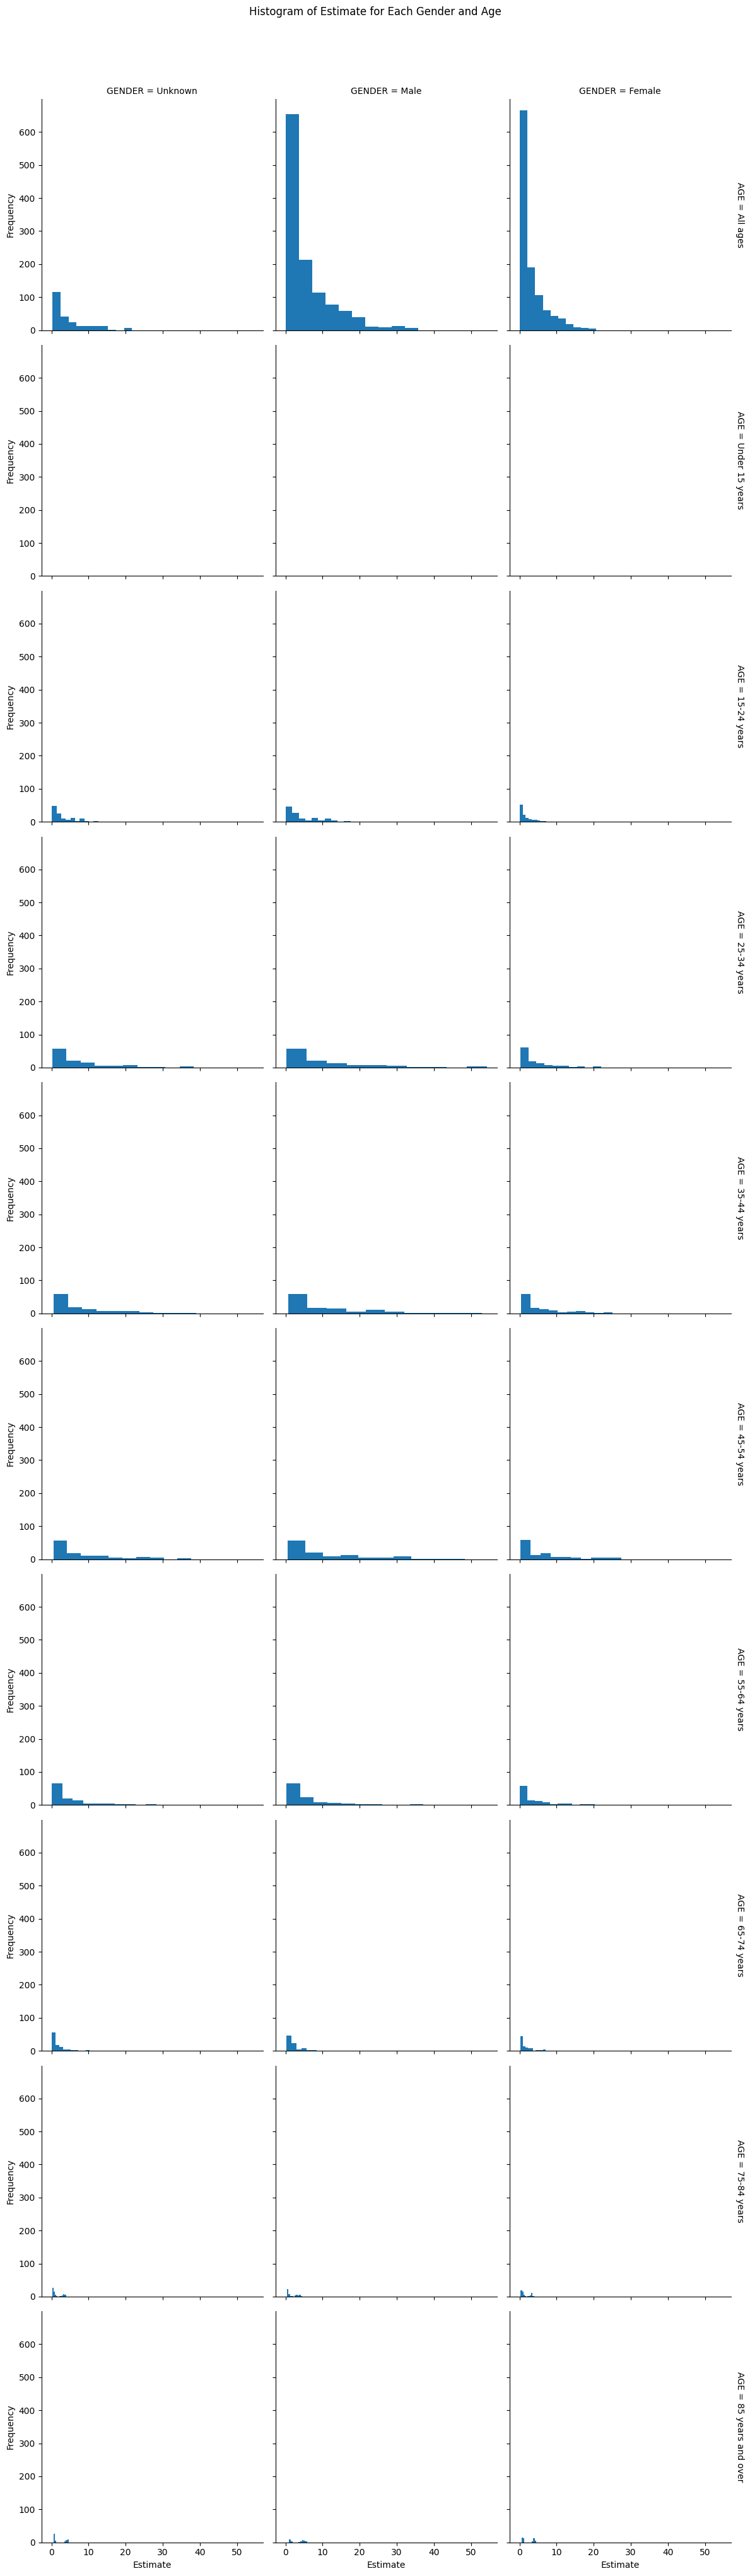

In [48]:
# Create a FacetGrid for histograms
g = sns.FacetGrid(df, row='AGE', col='GENDER', margin_titles=True, height=4)
g.map(plt.hist, 'ESTIMATE', bins=10)  # Adjust bins as needed
g.set_axis_labels('Estimate', 'Frequency')
plt.suptitle('Histogram of Estimate for Each Gender and Age', y=1.02)
plt.tight_layout()
plt.show()

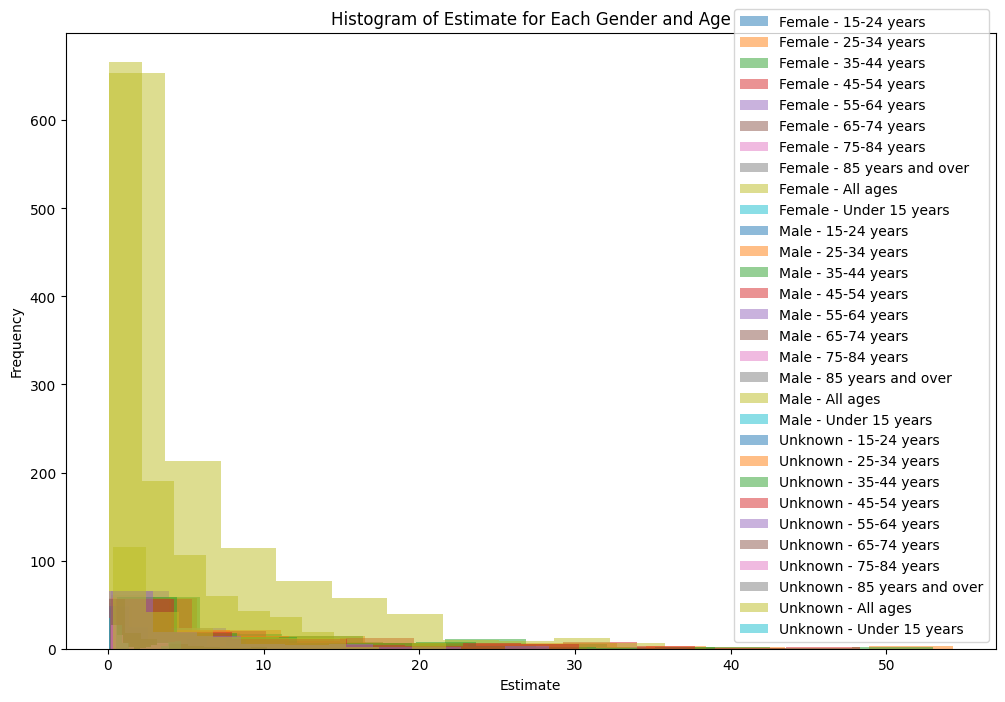

In [51]:
# Plot histograms for each gender and age combination
plt.figure(figsize=(12, 8))
for gender in ct.columns:
    for age in ct.index:
        plt.hist(df[(df['GENDER'] == gender) & (df['AGE'] == age)]['ESTIMATE'], bins=10, alpha=0.5, label=f'{gender} - {age}')

plt.title('Histogram of Estimate for Each Gender and Age')
plt.xlabel('Estimate')
plt.ylabel('Frequency')
plt.legend()
plt.show()

In [56]:
# Create crosstab to compute frequency counts
ct = pd.crosstab(index=df['AGE'], columns=df['GENDER'], values=df['ESTIMATE'], aggfunc=['count'])

In [57]:
print(ct)

                   count              
GENDER            Female  Male Unknown
AGE                                   
15-24 years          115   120     120
25-34 years          120   120     120
35-44 years          120   120     120
45-54 years          120   120     120
55-64 years          111   119     120
65-74 years           94    91     104
75-84 years           60    52      71
85 years and over     47    32      53
All ages            1140  1193     240
Under 15 years        40    50      65


In [58]:
frequency_prob_table = df['ESTIMATE'].value_counts(normalize=True).reset_index()
frequency_prob_table.columns = ['ESTIMATE', 'Probability']

In [59]:
frequency_prob_table

,ESTIMATE,Probability
0,0.3,0.045534
1,0.2,0.041821
2,0.4,0.032832
3,0.5,0.031659
4,0.7,0.030291
...,...,...
317,34.0,0.000195
318,28.5,0.000195
319,29.6,0.000195
320,29.2,0.000195


In [63]:
df.groupby(['ESTIMATE','AGE','GENDER'])['ESTIMATE'].value_counts().reset_index()

,ESTIMATE,AGE,GENDER,count
0,0.0,Under 15 years,Unknown,12
1,0.1,15-24 years,Female,3
2,0.1,15-24 years,Male,2
3,0.1,15-24 years,Unknown,4
4,0.1,55-64 years,Female,1
...,...,...,...,...
1819,48.9,25-34 years,Male,1
1820,49.6,25-34 years,Male,1
1821,52.4,35-44 years,Male,1
1822,53.0,35-44 years,Male,1


In [66]:
# Calculate frequency probability table for the estimates column grouped by age
frequency_prob_table_age = df.groupby('AGE')['ESTIMATE'].value_counts(normalize=True).reset_index(name='Probability')

# Calculate frequency probability table for the estimates column grouped by gender
frequency_prob_table_gender = df.groupby('GENDER')['ESTIMATE'].value_counts(normalize=True).reset_index(name='Probability')

# Divide by the count of each category within the group
category_counts_age = df['AGE'].value_counts()
frequency_prob_table_age['Probability'] /= frequency_prob_table_age['AGE'].map(category_counts_age)

category_counts_gender = df['GENDER'].value_counts()
frequency_prob_table_gender['Probability'] /= frequency_prob_table_gender['GENDER'].map(category_counts_gender)

print("Frequency Probability Table for the Estimates Column Grouped by Age:")
print(frequency_prob_table_age)
print("\nFrequency Probability Table for the Estimates Column Grouped by Gender:")
print(frequency_prob_table_gender)

Frequency Probability Table for the Estimates Column Grouped by Age:
                 AGE  ESTIMATE   Probability
0        15-24 years       0.3  1.721440e-04
1        15-24 years       0.5  1.408451e-04
2        15-24 years       0.2  1.330203e-04
3        15-24 years       0.6  1.330203e-04
4        15-24 years       0.7  9.389671e-05
...              ...       ...           ...
1096        All ages      20.3  1.300707e-07
1097  Under 15 years       0.1  1.594982e-03
1098  Under 15 years       0.2  8.960573e-04
1099  Under 15 years       0.0  2.150538e-04
1100  Under 15 years       0.3  7.168459e-05

[1101 rows x 3 columns]

Frequency Probability Table for the Estimates Column Grouped by Gender:
      GENDER  ESTIMATE   Probability
0     Female       0.3  2.900341e-05
1     Female       0.2  2.444573e-05
2     Female       0.4  2.030239e-05
3     Female       0.5  1.512321e-05
4     Female       0.6  1.367304e-05
..       ...       ...           ...
673  Unknown      20.6  6.686459e-

In [68]:
freq=df.groupby(['ESTIMATE','AGE','GENDER'])['ESTIMATE'].value_counts().reset_index()